<a href="https://www.kaggle.com/code/parisanahmadi/mlclasification-lr-term-deposit-opening-decision?scriptVersionId=101659494" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Term Deposit Opening Decision

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import FactorAnalysis
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef

In [2]:
#read csv file

df=pd.read_csv("../input/term-deposit-opening-decisionbank/bank.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Descriptive Analysis

In [3]:
print("Describe Dataset","\n")
print(df.info())
print(df.head(10))
print(df.describe())

Describe Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.id

# Continuous Variables

In [4]:
print("Continuous Variables","\n")
continous_vars=df.describe().columns
print(continous_vars)

Continuous Variables 

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [5]:
print("Categorical Variables","\n")
categorical_vars=df.describe(include=[object]).columns
print(categorical_vars)

Categorical Variables 

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


# Visualizing - Continous Variables

Continuous Variables Visualization 



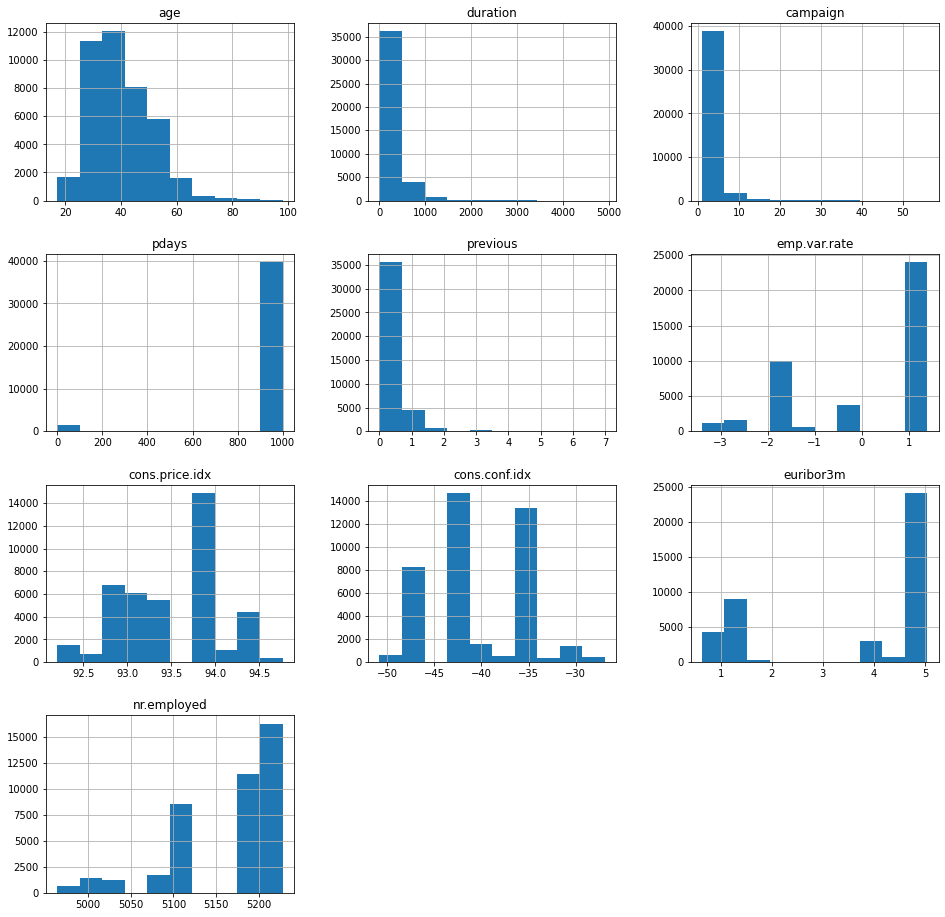

In [6]:
print("Continuous Variables Visualization","\n")
df.hist(column=continous_vars,figsize=(16,16))
plt.show()

# Visualizing - Categorical Variables

Categorical Variables Visualization 



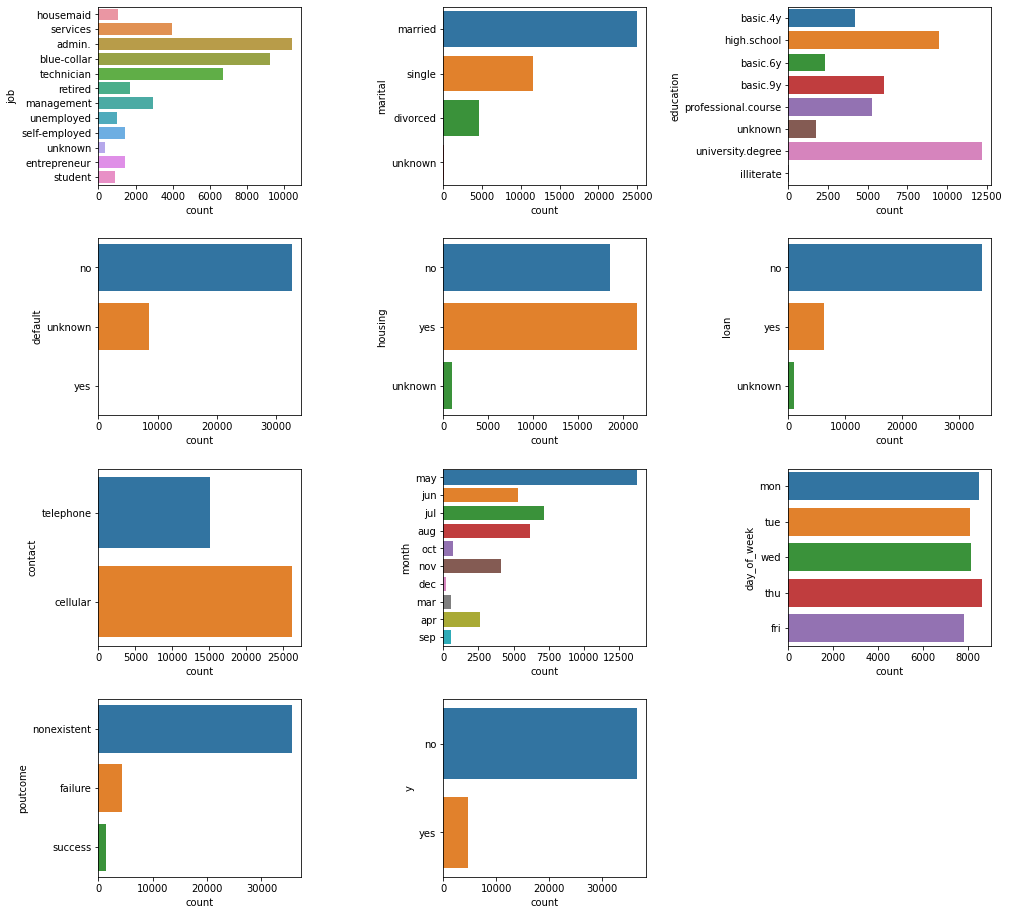

In [7]:
print("Categorical Variables Visualization","\n")
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)
for i, ax in enumerate(axes.ravel()):
    if i > 10:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df, ax=ax)
plt.show()

# Data Manipulation

In [8]:
# Convert pdays column numeric to categorical    
df["pdays_cat"]=[0 if each==999  else 1 for each in df.pdays]
df=df.drop(["pdays"],axis=1)

# Correlations

Correlation Matrix 



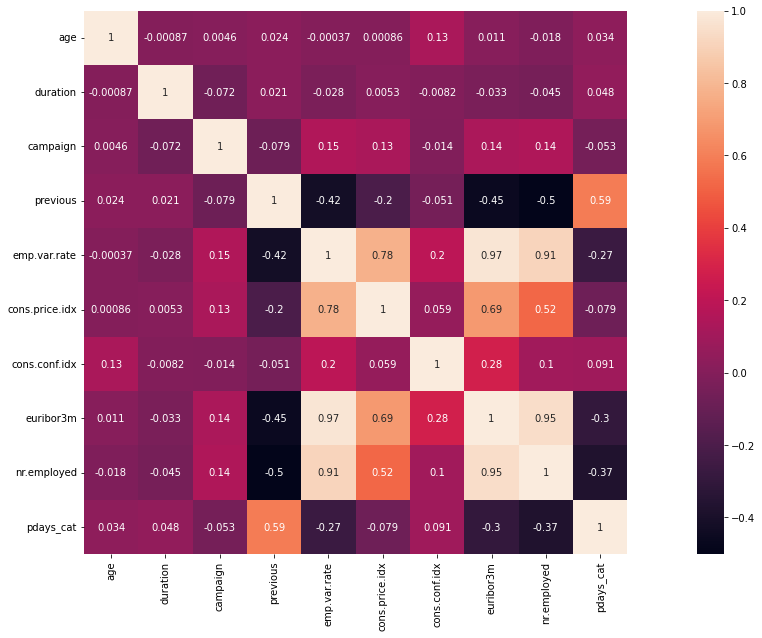

In [9]:
#Heat map
print("Correlation Matrix","\n")    
correlation=df.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.show()

# Factor Analysis

In [10]:
fact_2c=FactorAnalysis(n_components=1)
df["X_factor"]=fact_2c.fit_transform(df[['euribor3m','nr.employed','cons.price.idx','emp.var.rate']])
df=df.drop(["euribor3m","nr.employed","cons.price.idx","emp.var.rate"],axis=1)

/opt/conda/lib/python3.7/site-packages/sklearn/decomposition/_factor_analysis.py:292: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning,


# One - Hot Encoding

In [11]:
columns = df.select_dtypes(include=[object]).columns
df = pd.concat([df, pd.get_dummies(df[columns])], axis=1)
df = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome', 'y','duration'], axis =1)
print("\n","Describe Dataset_v2","\n")
print(df.info(),"\n \n \n")


 Describe Dataset_v2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   previous                       41188 non-null  int64  
 3   cons.conf.idx                  41188 non-null  float64
 4   pdays_cat                      41188 non-null  int64  
 5   X_factor                       41188 non-null  float64
 6   job_admin.                     41188 non-null  uint8  
 7   job_blue-collar                41188 non-null  uint8  
 8   job_entrepreneur               41188 non-null  uint8  
 9   job_housemaid                  41188 non-null  uint8  
 10  job_management                 41188 non-null  uint8  
 11  job_retired                    41188 non-null  uint8  
 12  job_self-employed     

# Data Normalization

In [12]:
min_max_scaler=preprocessing.MinMaxScaler()
data_scaled=pd.DataFrame(min_max_scaler.fit_transform(df),columns=df.columns)

In [13]:
y = data_scaled.y_yes
data_scaled = data_scaled.drop(['y_yes','y_no'], axis = 1)

# Test - Train Data Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.2, random_state=42)

# Upsampling

In [15]:
def upSample(X_train, y_train):
    df_all = pd.concat((X_train, pd.DataFrame({'value': y_train}, index=y_train.index)), axis=1)
    
    df_majority = df_all [df_all.value==0]
    df_minority = df_all[df_all.value==1]
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=df_majority.shape[0],    # to match majority class
                                     random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0)
    y_upsampled = df_upsampled.value
    X_upsampled = df_upsampled.drop('value', axis=1)

    return X_upsampled, y_upsampled

# Logistic Regression

In [16]:
X_train,y_train=upSample(X_train, y_train)
lr = LogisticRegression(random_state = 42)
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
print("Logistic Regression","\n")
print("Classification Report","\n")
print(classification_report(y_test, prediction))

Logistic Regression 

Classification Report 

              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89      7303
         1.0       0.33      0.63      0.44       935

    accuracy                           0.82      8238
   macro avg       0.64      0.73      0.66      8238
weighted avg       0.88      0.82      0.84      8238



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Confusion Matrix


Confusion Matrix 



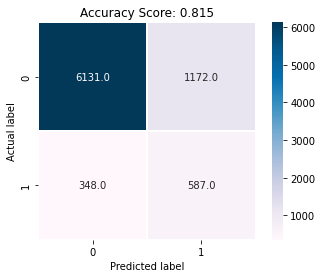

In [17]:


print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, prediction),3) 
cm1 = cm(y_test, prediction)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")



# Feature Selection


In [18]:
#lr = LogisticRegression(random_state = 42)
#rfe = RFE(lr, 10)
#rfe = rfe.fit(X_train, y_train)
#print("Feature Selection","\n")
#print(X_train[X_train.columns[rfe.ranking_==1].values].columns,"\n")

# Cross Validation


In [19]:


accuracies = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
print("Accuracy (mean): %",accuracies.mean()*100)
print("std: %",accuracies.std()*100)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy (mean): % 74.11865276115576
std: % 0.629984528113609


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [20]:


scores = cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=10,)
print ("MAE (mean): %" , scores.mean())



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


MAE (mean): % -0.25881347238844243


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Errors

In [21]:


mae = mean_absolute_error(lr.predict(X_test), y_test)
mse = mean_squared_error(lr.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)



Mean Absolute Error (MAE): 0.18
Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.43


# Cohen - Matthew Score


In [22]:
print("Cohen Score",cohen_kappa_score(y_test, prediction))
print("Matthew Score",matthews_corrcoef(y_test, prediction))

Cohen Score 0.3376076672667916
Matthew Score 0.3617337401504234


# K Nearest Neighbors


In [23]:
classifier = KNeighborsClassifier(n_neighbors=100,weights="distance")  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

print("KNN Algorithm")
print("Classification Report")
print(classification_report(y_test, y_pred)) 

KNN Algorithm
Classification Report
              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87      7303
         1.0       0.28      0.55      0.37       935

    accuracy                           0.79      8238
   macro avg       0.61      0.69      0.62      8238
weighted avg       0.86      0.79      0.82      8238



Confusion Matrix 



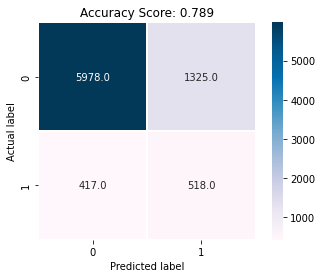

In [24]:


print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred),3) 
cm1 = cm(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")



In [25]:


accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy (mean): %",accuracies.mean()*100)
print("std: %",accuracies.std()*100)

scores = cross_val_score(classifier, X_train, y_train, scoring='neg_mean_absolute_error', cv=10,)
print ("MAE (mean): %" , scores.mean())
print("\n")



Accuracy (mean): % 90.9711061719952
std: % 0.37257601296823795
MAE (mean): % -0.09028893828004789




In [26]:


mae = mean_absolute_error(classifier.predict(X_test), y_test)
mse = mean_squared_error(classifier.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)
print("\n")



Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.21
Root Mean Squared Error (RMSE): 0.46




In [27]:


print("Cohen Score",cohen_kappa_score(y_test, y_pred))
print("Matthew Score",matthews_corrcoef(y_test, y_pred))



Cohen Score 0.2617532996199241
Matthew Score 0.28359018461717095


# Random Forest


In [28]:


rf = RandomForestClassifier(n_estimators=10 ,n_jobs=-1,
                            random_state=42, 
                            max_depth= 5
                           # class_weight="balanced",
                            #max_features=10)
                            )

rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
print("Random Forest Algorithm","\n")
print("Classification Report","\n")
print(classification_report(y_test, rf_predict))



Random Forest Algorithm 

Classification Report 

              precision    recall  f1-score   support

         0.0       0.95      0.83      0.88      7303
         1.0       0.32      0.63      0.43       935

    accuracy                           0.81      8238
   macro avg       0.63      0.73      0.66      8238
weighted avg       0.88      0.81      0.83      8238



Confusion Matrix 



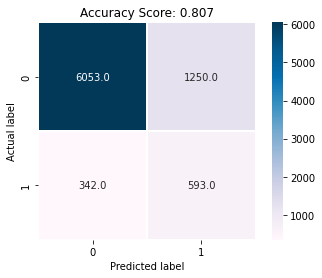

In [29]:
print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, rf_predict),3)
cm1 = cm(y_test, rf_predict)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
            square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [30]:


accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
print("Accuracy (mean): %",accuracies.mean()*100)
print("std: %",accuracies.std()*100)

scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=10,)
print ("MAE (mean): %" , scores.mean())
print("\n")



Accuracy (mean): % 74.17507266199351
std: % 0.5719814312983449
MAE (mean): % -0.258249273380065




In [31]:


mae = mean_absolute_error(rf.predict(X_test), y_test)
mse = mean_squared_error(rf.predict(X_test), y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)
print("\n")



Mean Absolute Error (MAE): 0.19
Mean Squared Error (MSE): 0.19
Root Mean Squared Error (RMSE): 0.44




In [32]:
print("Cohen Score",cohen_kappa_score(y_test, rf_predict))
print("Matthew Score",matthews_corrcoef(y_test, rf_predict))
print("\n")

Cohen Score 0.3253221888604588
Matthew Score 0.3524623366084098




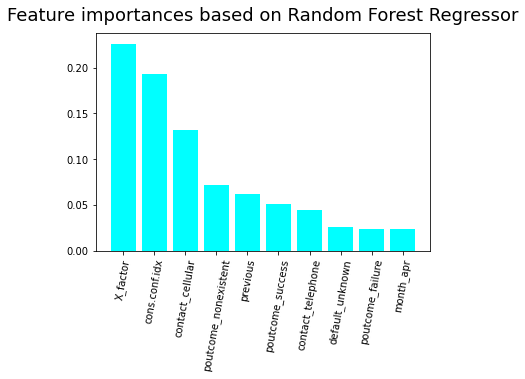

In [33]:


ranking = rf.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = data_scaled.columns
plt.title("Feature importances based on Random Forest Regressor", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="aqua", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()



# Summary



# In conclusion, Logistic Regression algorithm has better performance than other algorithms.

Minimum MSE ( Predict target variable with minimal error )

Max Cohen Kappa Score (Controlling accuracy of  the model and compares an Observed Accuracy with an Expected Accuracy (random chance))

Max Matthew Score (quantifying the quality of predictions)

Max Accuracy (high accuracy predict the labeled values)

Max Precision (high accuracy of positive predictions)

Max Recall (high accuracy predict the target value)

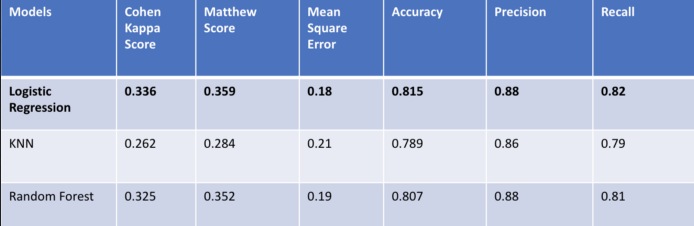

source: https://medium.com/analytics-vidhya/term-deposit-opening-decision-f57776b88453